,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,13/08/2021,Brentford,Arsenal,2,0,H
1,14/08/2021,Man United,Leeds,5,1,H
2,14/08/2021,Burnley,Brighton,1,2,A
3,14/08/2021,Chelsea,Crystal Palace,3,0,H
4,14/08/2021,Everton,Southampton,3,1,H


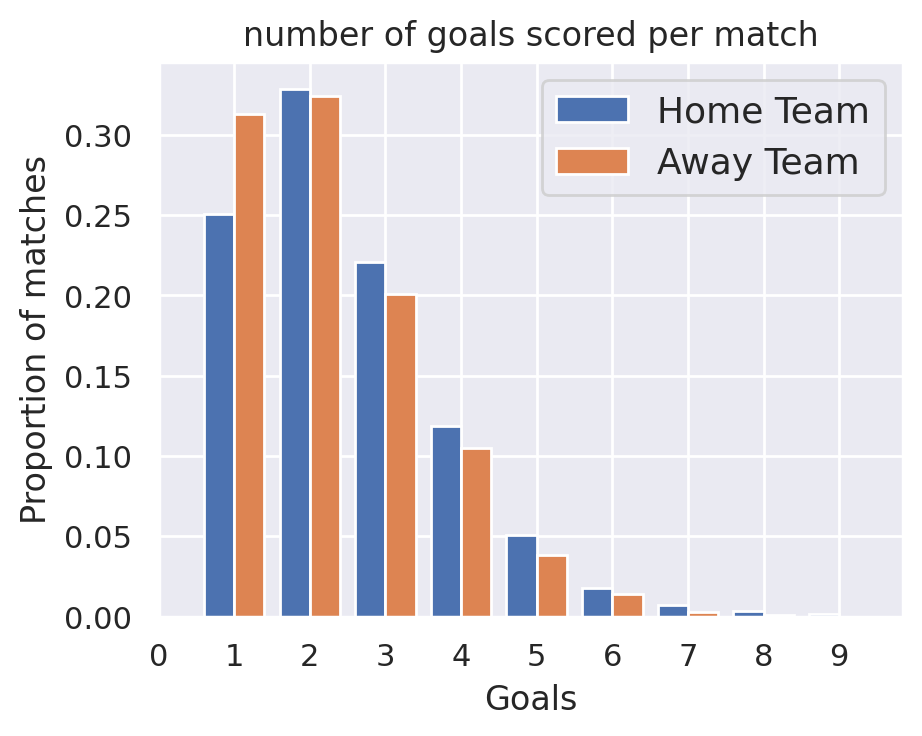

In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson


fd_1 = pd.read_csv('Results 20:21.csv')
fd_2 = pd.read_csv('Results 21:22.csv')
fd_3 = pd.read_csv('Results 22:23.csv')

csv_files = glob.glob('*.{}'.format('csv'))
csv_files

fixtures = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)
fixtures

fixtures = fixtures[['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR']]

sns.set()
plt.hist(fixtures[['FTHG', 'FTAG']].values, range(10), label=['Home Team', 'Away Team'], density=True)
plt.xticks([i-0.5 for i in range(10)], [i for i in range(10)])
plt.xlabel('Goals')
plt.ylabel('Proportion of matches')
plt.legend(loc='upper right', fontsize=13)
plt.title('number of goals scored per match', size=12)

def log_probability(goals_home_observed,goals_away_observed,home_attack,home_defence,away_attack,away_defence,home_advanatge):
    goal_expectation_home = np.exp(home_attack+away_defence+home_advanatge)
    goal_expectation_away = np.exp(away_attack+home_defence)
    
    if goal_expectation_home < 0 or goal_expectation_away < 0:
        return 10000
    
    home_lp = poisson.pmf(goals_home_observed, goal_expectation_home)
    away_lp = poisson,pmf(goals_away_observed, goal_expectation_away)
    
    log_lp = np.log(home_lp)+np.log(away_lp)
    return -log_lp
fixtures.head()
